     YEAR  SUNACTIVITY
0  1700.0          5.0
1  1701.0         11.0
2  1702.0         16.0
3  1703.0         23.0
4  1704.0         36.0
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1406.585
Date:                Wed, 15 Oct 2025   AIC                           2819.169
Time:                        04:00:52   BIC                           2830.369
Sample:                             0   HQIC                          2823.647
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3963      9.949      4.865      0.000      28.897      

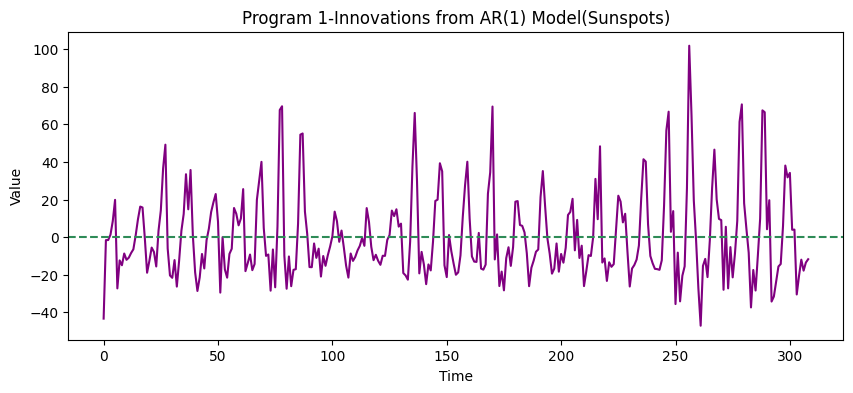

In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.datasets import sunspots 
from statsmodels.tsa.arima.model import ARIMA

data=sunspots.load_pandas().data
print(data.head())
data1=data['SUNACTIVITY']
model=ARIMA(data1,order=(1,0,0))
fit=model.fit()
print(fit.summary())
innovations=fit.resid
print("The first few innovations:",innovations.head(10))
print("The rest of the innovations\n:")
print(innovations)

plt.figure(figsize=(10,4)) 
plt.plot(innovations, color = "purple")
plt.axhline(0, color = "seagreen", linestyle = "--")
plt.title("Program 1-Innovations from AR(1) Model(Sunspots)") 
plt.xlabel("Time") 
plt.ylabel("Value") 
plt.show() 


       year  quarter    realgdp  realcons   realinv  realgovt  realdpi  \
0    1959.0      1.0   2710.349    1707.4   286.898   470.045   1886.9   
1    1959.0      2.0   2778.801    1733.7   310.859   481.301   1919.7   
2    1959.0      3.0   2775.488    1751.8   289.226   491.260   1916.4   
3    1959.0      4.0   2785.204    1753.7   299.356   484.052   1931.3   
4    1960.0      1.0   2847.699    1770.5   331.722   462.199   1955.5   
..      ...      ...        ...       ...       ...       ...      ...   
198  2008.0      3.0  13324.600    9267.7  1990.693   991.551   9838.3   
199  2008.0      4.0  13141.920    9195.3  1857.661  1007.273   9920.4   
200  2009.0      1.0  12925.410    9209.2  1558.494   996.287   9926.4   
201  2009.0      2.0  12901.504    9189.0  1456.678  1023.528  10077.5   
202  2009.0      3.0  12990.341    9256.0  1486.398  1044.088  10040.6   

         cpi      m1  tbilrate  unemp      pop  infl  realint  
0     28.980   139.7      2.82    5.8  177.146 

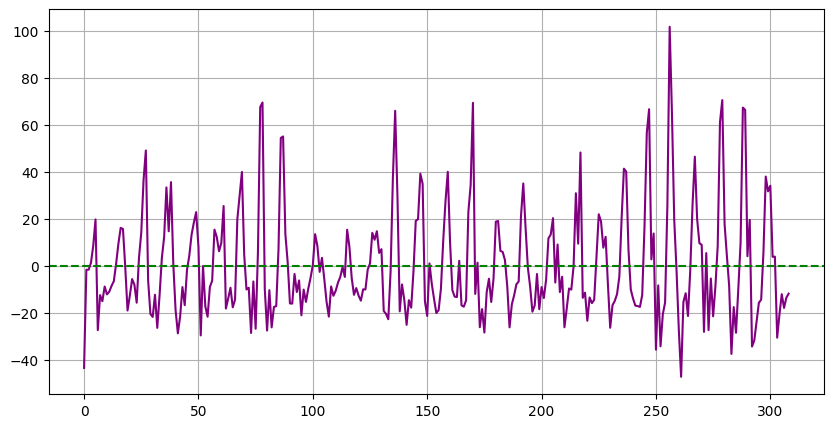

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import macrodata
from statsmodels.tsa.arima.model import ARIMA

macro=macrodata.load_pandas().data
print(macro)

gdp=macro['realgdp']

model1=ARIMA(gdp,order=(2,0,1))
fit=model1.fit()
print(fit.summary())
innovations1=fit.resid
print("The innovations:",innovations.head(10))
print(innovations)

plt.figure(figsize=(10,5))
plt.plot(innovations,color="purple")
plt.axhline(0,color="green",linestyle="--")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.datasets import macrodata 
cpi = macro['cpi'] 
inflation = np.log(cpi).diff().dropna() 
model = ARIMA(inflation, order=(1,1,1)).fit() 
innovations = model.resid 
print(model.summary()) 
print("\n First 10 Innovations:\n",innovations.head(10))


In [32]:
#Innovations from ARIMA(1, 1, 1) (Airline Passengers) 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.datasets import get_rdataset 
airline_data = get_rdataset("AirPassengers").data
print(airline_data)
model = ARIMA(airline_data['value'],order=(1,1,1)).fit()  
innovations = model.resid 
print(model.summary())
print("\n First 10 Innovations:\n",innovations.head(10))

#Ljung-Box Test on Innovations 
from statsmodels.stats.diagnostic import acorr_ljungbox 
lb_test = acorr_ljungbox(innovations,lags=[10],return_df=True) 
print(lb_test)

            time  value
0    1949.000000    112
1    1949.083333    118
2    1949.166667    132
3    1949.250000    129
4    1949.333333    121
..           ...    ...
139  1960.583333    606
140  1960.666667    508
141  1960.750000    461
142  1960.833333    390
143  1960.916667    432

[144 rows x 2 columns]
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Wed, 15 Oct 2025   AIC                           1394.683
Time:                        04:07:56   BIC                           1403.571
Sample:                             0   HQIC                          1398.294
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|  